In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

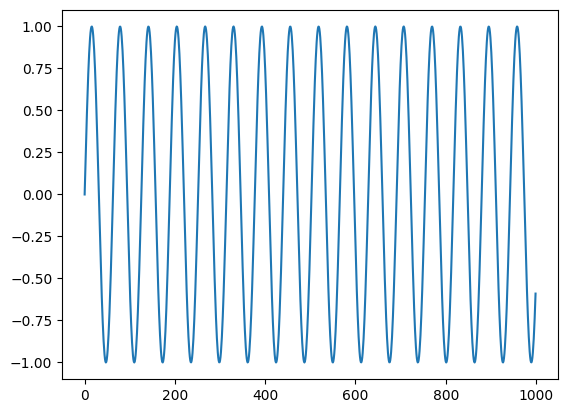

In [2]:
series = np.sin(0.1 * np.arange(1000))
plt.plot(series)
plt.show()

In [4]:
T = 10
X = []
Y = []


for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)
N = len(X)

print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (990, 10, 1) Y.shape (990, 1)


In [5]:
#RNN 모델 building

# RNN 모델 building

class SimpleRNN(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs):
    super(SimpleRNN, self).__init__()
    self.D = n_inputs
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.rnn = nn.RNN(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        nonlinearity='relu',
        batch_first=True)
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    h0 = torch.zeros(self.L, X.size(0), self.M)
    out, _ = self.rnn(X, h0)
    out = self.fc(out[:, -1, :])
    return out

model = SimpleRNN(n_inputs=1, n_hidden=15, n_rnnlayers=1, n_outputs=1)

# loss, optimizer
# split 후에 datatype: 텐서형으로 변환, float32

AttributeError: module 'torch.nn' has no attribute 'Model'